# Filtracja bilateralna

## Konwolucja obrazu z filtrem o zadanych współczynnikach

Splot (konwolucję) obrazu wejściowego $I$ z filtrem $\psi$ dla ustalonego punktu obrazu $\mathbf{x}$ można przedstawić następująco:

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||)I(\mathbf{p})
\end{equation}

gdzie:
- $\hat{I}$ jest obrazem wynikowym (przefiltrowanym),
- $W_N = \sum_y \psi(y)$ jest parametrem normalizującym współczynniki filtra $\psi$,
- $||\cdot||$ jest odległością między punktami obrazu $\mathbf{x}$ i $\mathbf{p}$ według ustalonej metryki (np. norma $L_2$). Uwaga, proszę pamiętać, że zarówno $\mathbf{x}$, jak i $\mathbf{p}$ to współrzędne przestrzenne,
- $\eta(\mathbf{x})$ jest otoczeniem punktu $\mathbf{x}$.

Funkcja $\psi$ decyduje o charakterze filtracji. Dla filtru Gaussowskiego:

\begin{equation}
\psi(y) = G_{\delta_s}(y)
\end{equation}

gdzie: $G_{\delta_s}(y)$ jest funkcją Gaussa z parametrem skali $\delta_s$.

Opisaną powyżej filtrację realizowaliśmy w ramach ćwiczenia "Przetwarzanie wstępne. Filtracja kontekstowa."

## Filtracja bilateralna

Wadą klasycznego splotu jest brak adaptacji współczynników filtra do lokalnego otoczenia $\eta(\mathbf{x})$ filtrowanego punktu $\mathbf{x}$.
Oznacza to wykorzystanie tych samych współczynników filtra $\psi$ niezależnie od tego czy otoczenie jest względnie jednorodne lub zawiera krawędzie obiektów (w tym przypadku dochodzi do "rozmywania" krawędzi).
Filtracja bilateralna uwzględnia lokalne otoczenie filtrowanego punktu, w ten sposób, że parametry filtra zmieniają się w zależności od "wyglądu" otocznia.


Współczynniki filtra obliczane są na podstawie odległości filtrowanego punktu $\mathbf{x}$ od każdego punktu otoczenia $\mathbf{p}$ w dziedzinie przestrzennej obrazu (tak jak przy typowym filtrze np. Gaussa) oraz odległości punktów w przeciwdziedzinie obrazu (np. na podstawie różnicy w jasności pikseli dla obrazu w odcieniach szarości):

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||) \gamma(|I(\mathbf{p}) - I(\mathbf{x})|) I(\mathbf{p})
\end{equation}
gdzie:
- $W_N$ jest współczynnikiem normalizującym filtr,
- $\gamma$ jest funkcją odległości w przeciwdziedzinie obrazu, np. $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$
- parametr $\delta_r$ jest utożsamiany z poziomem szumu w obrazie i należy go dobrać w sposób empiryczny.

Proszę chwilę zastanowić się nad powyższym równaniem, w szczególności nad funkcją $\gamma$. Proszę wyznaczyć, jaka będzie wartość funkcji dla pikseli podobnych (różnica 0, 1, 2), a skrajnie różnych (255, 200).

##  Realizacja ćwiczenia

### Wczytanie danych

1. Wczytaj dane z pliku *MR_data.mat*. W tym celu wykorzystaj funkcję `loadmat` z pakietu scipy:
        from scipy.io import loadmat
        mat = loadmat('MR_data.mat')

2. Wczytany plik zawiera 5 obrazów: *I_noisefree*, *I_noisy1*, *I_noisy2*, *I_noisy3* oraz *I_noisy4*. Odczytać je można w następujący sposób:
        Input = mat['I_noisy1']

3.Wyświetl wybrany obraz z pliku *MR_data.mat*. Zagadka - co to za obrazowanie medyczne?

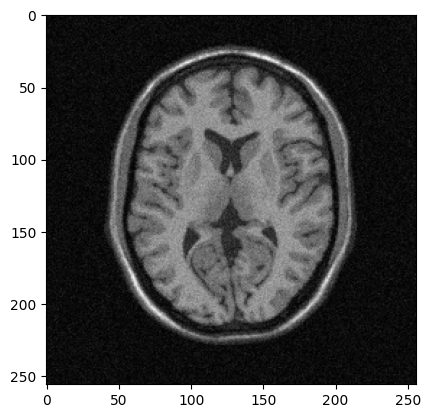

In [39]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import loadmat
import math

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/'

fileNames = ["MR_data.mat"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

#TODO Samodzielna
mat = loadmat('MR_data.mat')
Input = mat['I_noisy1']
plt.imshow(Input, 'gray')
plt.show()



### "Klasyczna" konwolucja

1. Zdefiniuj parametry filtra Gaussowskiego: rozmiar okna i wariancję $\delta_S$.
2. Oblicz współczynniki filtra na podstawie zdefiniowanych parametrów (najprościej w ramach podwójnej pętli for).
2. Sprawdź ich poprawność i zwizualizuj filtr (tak jak w ćwiczeniu pt. "Przetwarzanie wstępne. Filtracja kontekstowa.").
3. Wykonaj kopię obrazu wejściowego: `IConv = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentem tej funkcji są aktualnie przetwarzane okno i współczynniki filtra.
7. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
8. Wyświetl wynik filtracji.
9. Porównaj wynik z obrazem oryginalnym.

In [40]:
#TODO Samodzielna

window_size = 7
delta_s = 1.5

In [41]:
def gaussian_kernel(size, sigma):
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    for i in range(size):
        for j in range(size):
            x, y = i - center, j - center
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

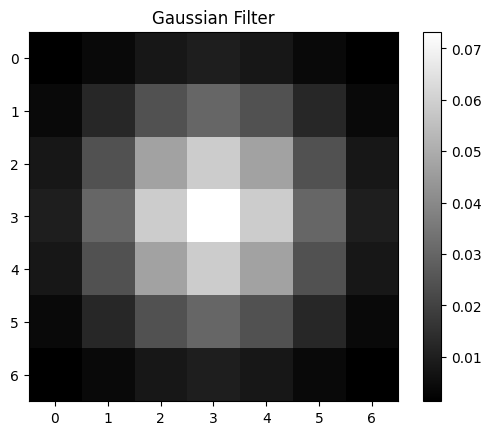

In [42]:
gauss_filter = gaussian_kernel(window_size, delta_s)

plt.imshow(gauss_filter, cmap='gray')
plt.title("Gaussian Filter")
plt.colorbar()
plt.show()

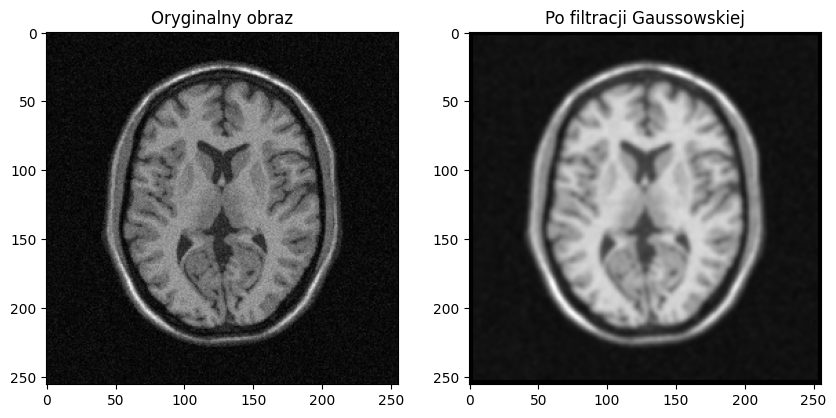

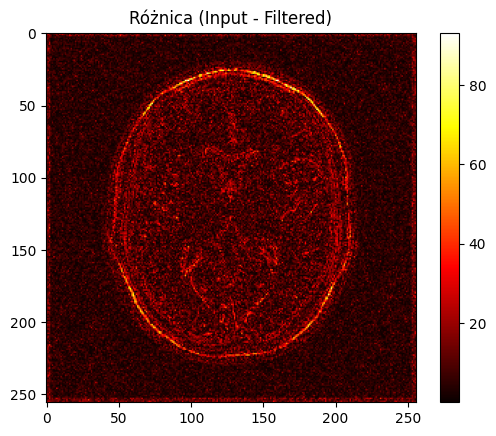

In [43]:
IConv = Input.copy()

def apply_filter(image, kernel):
    output = np.zeros_like(image)
    rows, cols = image.shape
    k_size = kernel.shape[0] // 2
    for i in range(k_size, rows - k_size):
        for j in range(k_size, cols - k_size):
            window = image[i - k_size:i + k_size + 1, j - k_size:j + k_size + 1]
            output[i, j] = np.sum(window * kernel)
    return output

I_filtered = apply_filter(Input, gauss_filter)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Oryginalny obraz")
plt.imshow(Input, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Po filtracji Gaussowskiej")
plt.imshow(I_filtered, cmap='gray')
plt.show()

difference = np.abs(Input - I_filtered)
plt.title("Różnica (Input - Filtered)")
plt.imshow(difference, cmap='hot')
plt.colorbar()
plt.show()

### Filtracja bilateralna

1. Zdefiniuj dodatkowy parametr: wariancję $\delta_R$.
3. Wykonaj kopię obrazu wejściowego: `IBilateral = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentami funkcji są aktualnie przetwarzane okno, współczynniki filtra gausowskiego (takie same jak wcześniej) i wariancja $\delta_R$.
7. Oblicz odległość w przeciwdziedzinie (dla wartości pikseli).
8. Oblicz funkcję Gaussa dla obliczonych odległości z zadanym parametrem.
9. Wykonaj normalizację obliczonych współczynników.
10. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
11. Wyświetl wynik filtracji.
12. Porównaj wynik z obrazem oryginalnym.

In [44]:
delta_r = 25.0

IBilateral = Input.copy().astype(np.float32)

In [45]:
def gaussian_kernel(size, sigma):
    ax = np.arange(-size//2 + 1., size//2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

spatial_kernel = gaussian_kernel(window_size, delta_s)

In [46]:
def bilateral_filter(image, w_size, sigma_s, sigma_r):
    half = w_size // 2
    out = np.zeros_like(image)
    rows, cols = image.shape

    for i in range(half, rows - half):
        for j in range(half, cols - half):
            window = image[i-half:i+half+1, j-half:j+half+1]

            diff = window - image[i, j]

            range_kernel = np.exp(-(diff**2) / (2. * sigma_r**2))

            weights = spatial_kernel * range_kernel
            weights /= np.sum(weights)

            out[i, j] = np.sum(window * weights)

    return out

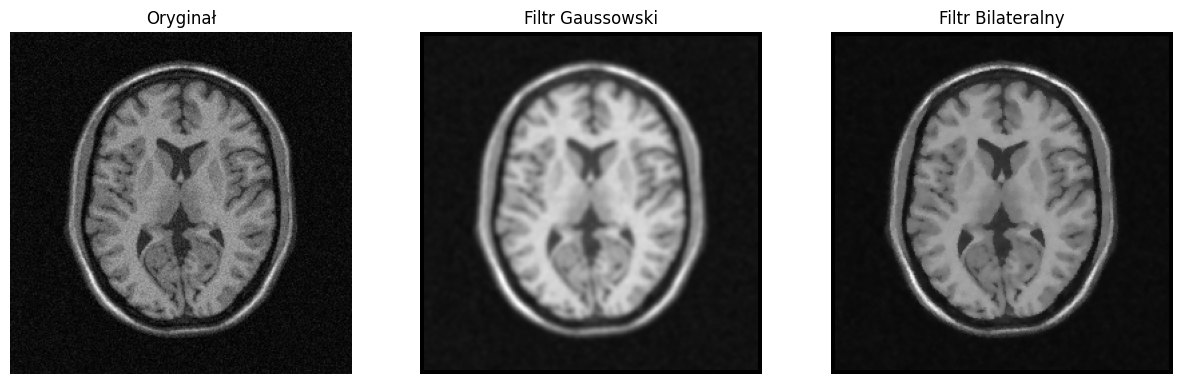

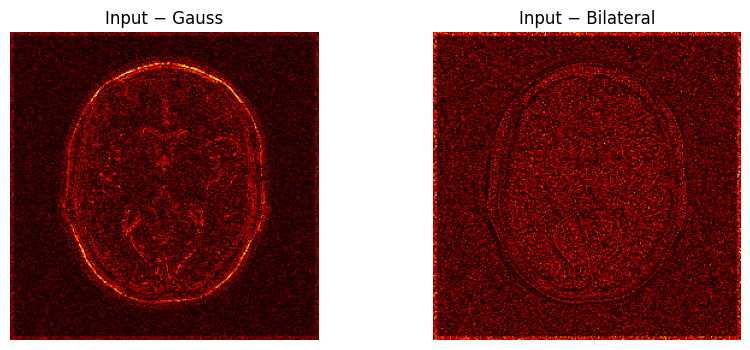

In [47]:
I_bilateral = bilateral_filter(IBilateral, window_size, delta_s, delta_r)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Oryginał")
plt.imshow(Input, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Filtr Gaussowski")
I_gauss = apply_filter(Input, gaussian_kernel(window_size, delta_s))
plt.imshow(I_gauss, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Filtr Bilateralny")
plt.imshow(I_bilateral, cmap='gray')
plt.axis('off')

plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Input − Gauss")
plt.imshow(np.abs(Input - I_gauss), cmap='hot')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Input − Bilateral")
plt.imshow(np.abs(Input - I_bilateral), cmap='hot')
plt.axis('off')

plt.show()